# Aprendizaje supervisado: Problemas de clasificación

## Importar librerias

In [53]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
# Importar bibliotecas de gráficos
import matplotlib.pyplot as plt
# Importar Seaborn para gráficos estadísticos
import seaborn as sns
# Dividir los marcos de datos X e Y en un conjunto de entrenamiento y u conjunto de prueba.

# Para ello, utilizaremos la función de división de datos del paquete Sklearn, que se basa en una función aleatoria.
from sklearn.model_selection import train_test_split

import numpy as np
import os, sys
from scipy import stats

# Calcular medidas de precisión y matriz de confusión
from sklearn import metrics
import seaborn as sn

%matplotlib inline


### Paso 2

Cargar el conjunto de datos con el comando read_csv. El resultado se muestra a continuación.

In [54]:
loan_df = pd.read_csv("data/CreditRisk.csv")
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,1


### Paso 3

Examinar la forma de los datos

In [55]:
loan_df.shape

(614, 13)

### Paso 4

credit_df = loan_df.drop('Loan_ID', axis =1 ) # Se omite esta columna, ya que de todas formas se mapeará 1-1:

In [56]:
credit_df = loan_df.drop("Loan_ID", axis=1)

credit_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,0,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,1


### Paso 5

A continuación, normaliza los valores del Valor del Préstamo (Loan Value) y visualízalos también.

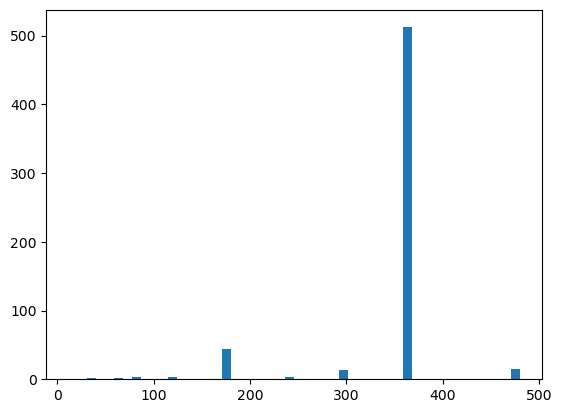

In [57]:
credit_df.Loan_Amount_Term.value_counts(normalize=True)

plt.hist(credit_df.Loan_Amount_Term, 50)

plt.show()

### Paso 6

Visualiza los datos como un gráfico de líneas.

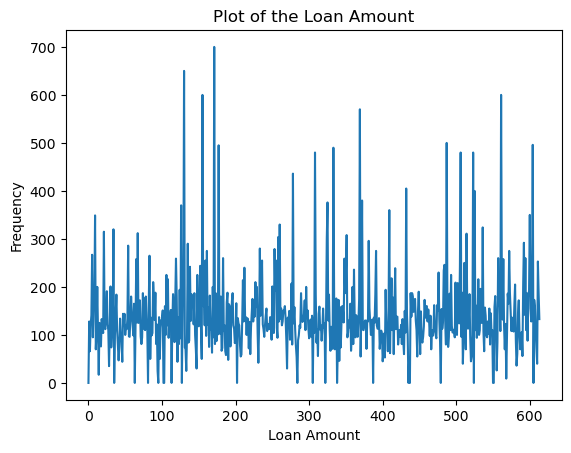

In [58]:
plt.plot(credit_df.LoanAmount)
plt.xlabel('Loan Amount')
plt.ylabel("Frequency")
plt.title("Plot of the Loan Amount")

plt.show()

**Consejo:** Solo hemos mostrado una visualización. Se recomienda generar más gráficos y diagramas. Recuerda que los diagramas son una excelente manera de representar datos intuitivamente.

### Paso 7

El importe del préstamo está muy sesgado, por lo que eliminamos esta variable

In [59]:
credit_df.drop(["Loan_Amount_Term"], axis=1, inplace=True)

### Paso 8

A continuación, se realiza el tratamiento de valores faltantes y el valor faltante de cada variable se reemplaza por 0. Compare los resultados después de reemplazar los valores faltantes con la mediana.

In [60]:
credit_df = credit_df.fillna("0")
# credit_df = credit_df.replace({"NaN":credit-df.median()})
credit_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71,1.0,Rural,1
610,Male,Yes,3+,Graduate,No,4106,0.0,40,1.0,Rural,1
611,Male,Yes,1,Graduate,No,8072,240.0,253,1.0,Urban,1
612,Male,Yes,2,Graduate,No,7583,0.0,187,1.0,Urban,1


### Paso 9

A continuación, analizaremos la distribución de nuestras variables

In [61]:
credit_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,614.0,141.166124,88.340630,0.0,98.0,125.0,164.75,700.0
Loan_Status,614.0,0.687296,0.463973,0.0,0.0,1.0,1.00,1.0


### Paso 10

Analicemos la columna de destino, "Estado del Préstamo" (Loan_Status), para comprender cómo se distribuyen los datos entre los distintos valores.

In [62]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    int64  
 8   Credit_History     614 non-null    object 
 9   Property_Area      614 non-null    object 
 10  Loan_Status        614 non-null    int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 52.9+ KB


In [63]:
credit_df.groupby("Loan_Status").mean(numeric_only=True)

,ApplicantIncome,CoapplicantIncome,LoanAmount
Loan_Status,,,
0,5446.078125,1877.807292,142.557292
1,5384.068720,1504.516398,140.533175


### Paso 11

Ahora convertiremos las variables X e Y en una variable categórica.

In [64]:
#Convert X & Y variable to a categorical variable as relevant
credit_df['Loan_Status'] = credit_df['Loan_Status'].astype('category')
credit_df['Credit_History'] = credit_df['Credit_History'].astype('category')

### Paso 12

Verifica los tipos de datos presentes en los datos actuales, como se muestra en el resultado

In [65]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Gender             614 non-null    object  
 1   Married            614 non-null    object  
 2   Dependents         614 non-null    object  
 3   Education          614 non-null    object  
 4   Self_Employed      614 non-null    object  
 5   ApplicantIncome    614 non-null    int64   
 6   CoapplicantIncome  614 non-null    float64 
 7   LoanAmount         614 non-null    int64   
 8   Credit_History     614 non-null    category
 9   Property_Area      614 non-null    object  
 10  Loan_Status        614 non-null    category
dtypes: category(2), float64(1), int64(2), object(6)
memory usage: 44.8+ KB


### Paso 13

Verifica el equilibrio de los datos. Obtendremos el siguiente resultado

In [66]:
#Calculate baseline proportion - ratio of Yes to No to identify data imbalance
prop_Y = credit_df['Loan_Status'].value_counts(normalize=True)
print(prop_Y)

Loan_Status
1    0.687296
0    0.312704
Name: proportion, dtype: float64


Parece haber un ligero desequilibrio en el conjunto de datos, ya que una clase representa el 31.28 % y la otra el 68.72 %.

**Nota:** Si bien el conjunto de datos no presenta un desequilibrio importante, también se suele examinar cómo gestionar el desequilibrio de datos.

### Paso 14

Ahora definiremos las variables X e Y

In [67]:
## Define X and Y variables
X = credit_df.drop('Loan_Status', axis=1)
Y = credit_df[['Loan_Status']]

### Paso 15

Utilizando la codificación one-hot, convertiremos las variables categóricas en numéricas

In [68]:
#Convert categorical variables to dummy variables
X = pd.get_dummies(X, drop_first=True)

### Paso 16

Dividamos los conjuntos en conjuntos de entrenamiento y de prueba. Dividimos en una proporción de 70:30

In [69]:
##Split into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

### Paso 17

Construyamos el modelo de regresión logística

In [70]:
print(X_train.dtypes)
print(y_train.dtypes)


ApplicantIncome              int64
CoapplicantIncome          float64
LoanAmount                   int64
Gender_Female                 bool
Gender_Male                   bool
Married_No                    bool
Married_Yes                   bool
Dependents_1                  bool
Dependents_2                  bool
Dependents_3+                 bool
Education_Not Graduate        bool
Self_Employed_No              bool
Self_Employed_Yes             bool
Credit_History_1.0            bool
Credit_History_0              bool
Property_Area_Semiurban       bool
Property_Area_Urban           bool
dtype: object
Loan_Status    category
dtype: object


In [71]:
#Build the logistic regression model
import statsmodels.api as sm
logit = sm.Logit(y_train, sm.add_constant(X_train))
lg = logit.fit()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

### Paso 18

Revisaremos el resumen del modelo. Los resultados son los siguientes

In [ ]:
# Summary of logistic regression

from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
lg.summary()

NameError: name 'lg' is not defined